In [177]:
import pandas as pd
import math

In [178]:
#Create DF
data = {
  "calories": [420, 380,math.nan, 390],
  "duration": [50,float('NaN'), 40, 45],
  "yasin": [5,8,9,999]
}

In [179]:
#load data into a DataFrame object:
df = pd.DataFrame(data)

In [180]:
#set a column as index
df.set_index('yasin')

,calories,duration
yasin,,
5,420.0,50.0
8,380.0,NaN
9,NaN,40.0
999,390.0,45.0


In [181]:
#Add Index Column
df = pd.DataFrame(data, index = ["day1", "day2", "day3","day4"])

In [182]:
df.head(9)

,calories,duration,yasin
day1,420.0,50.0,5
day2,380.0,NaN,8
day3,NaN,40.0,9
day4,390.0,45.0,999


In [183]:
#add new column
address = ['Delhi', 'Bangalore', 'Chennai', 'Patna']
df['Address'] = address

In [184]:
#add new row
df.loc['day7'] = [250, 60, 0,'Ankara'] 

In [185]:
#add new row
df.loc[len(df.index)] = [99999, 12, 7,'Istanbul'] 

In [186]:
#drop nan values
new_df_drop = df.dropna()

In [187]:
print(df.head(9))
print(new_df_drop.head(9))

      calories  duration  yasin    Address
day1     420.0      50.0      5      Delhi
day2     380.0       NaN      8  Bangalore
day3       NaN      40.0      9    Chennai
day4     390.0      45.0    999      Patna
day7     250.0      60.0      0     Ankara
5      99999.0      12.0      7   Istanbul
      calories  duration  yasin   Address
day1     420.0      50.0      5     Delhi
day4     390.0      45.0    999     Patna
day7     250.0      60.0      0    Ankara
5      99999.0      12.0      7  Istanbul


In [188]:
#replace nan values with mean/median etc
new_df=df
mediann=new_df['calories'].mean()
new_df["calories"].fillna(mediann, inplace = True)

In [189]:
new_df.head(9)

,calories,duration,yasin,Address
day1,420.0,50.0,5,Delhi
day2,380.0,NaN,8,Bangalore
day3,20287.8,40.0,9,Chennai
day4,390.0,45.0,999,Patna
day7,250.0,60.0,0,Ankara
5,99999.0,12.0,7,Istanbul


In [190]:
new_df.rename(columns={'yasin':'Erdem'}, inplace=True)

In [191]:
import random
for i in range(1,20):
    df.loc[len(df.index)] = [300, 34, random.randint(2, 20),'XXX'] 

print(df.shape)
new_df.head()


(25, 4)


,calories,duration,Erdem,Address
day1,420.0,50.0,5,Delhi
day2,380.0,NaN,8,Bangalore
day3,20287.8,40.0,9,Chennai
day4,390.0,45.0,999,Patna
day7,250.0,60.0,0,Ankara


In [192]:
#fill nan values with x
new_df["duration"].fillna(189, inplace = True)

<AxesSubplot:>

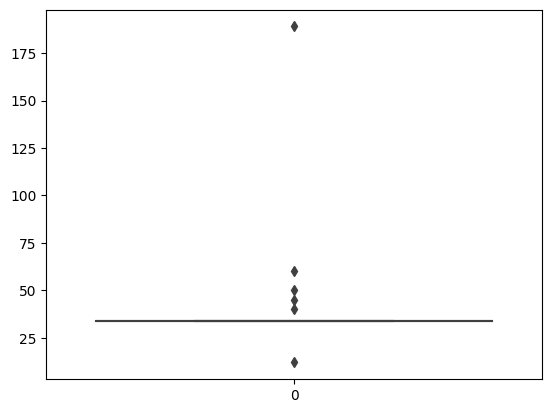

In [193]:
import seaborn as sns
import numpy as np

sns.boxplot(np.array(new_df['duration']))

In [194]:
#find the limits - Z-score
upper_limit=new_df['Erdem'].mean() +3*new_df['Erdem'].std()
lower_limit=new_df['Erdem'].mean() -3*new_df['Erdem'].std()
print(upper_limit)
print(lower_limit)

643.7402196133588
-541.9802196133588


In [195]:
#find the outliers
new_df.loc[(new_df['Erdem']>upper_limit) | (new_df['Erdem']<lower_limit)]

,calories,duration,Erdem,Address
day4,390.0,45.0,999,Patna


In [196]:
#delete outliers
deleted_outliers=new_df.loc[(new_df['Erdem']<upper_limit) & (new_df['Erdem']>lower_limit)]

In [197]:
deleted_outliers.head(30)

,calories,duration,Erdem,Address
day1,420.0,50.0,5,Delhi
day2,380.0,189.0,8,Bangalore
day3,20287.8,40.0,9,Chennai
day7,250.0,60.0,0,Ankara
5,99999.0,12.0,7,Istanbul
6,300.0,34.0,16,XXX
7,300.0,34.0,18,XXX
8,300.0,34.0,10,XXX
9,300.0,34.0,18,XXX
10,300.0,34.0,20,XXX


In [198]:
#replace outliers values with limits
replaced_outliers=new_df

In [199]:
replaced_outliers.loc[replaced_outliers['Erdem']>upper_limit,'Erdem']=upper_limit
replaced_outliers.loc[replaced_outliers['Erdem']<lower_limit,'Erdem']=lower_limit

In [200]:
replaced_outliers.head(30)

,calories,duration,Erdem,Address
day1,420.0,50.0,5.00000,Delhi
day2,380.0,189.0,8.00000,Bangalore
day3,20287.8,40.0,9.00000,Chennai
day4,390.0,45.0,643.74022,Patna
day7,250.0,60.0,0.00000,Ankara
5,99999.0,12.0,7.00000,Istanbul
6,300.0,34.0,16.00000,XXX
7,300.0,34.0,18.00000,XXX
8,300.0,34.0,10.00000,XXX
9,300.0,34.0,18.00000,XXX


In [201]:
#IQR method
q1=new_df['Erdem'].quantile(0.25)
q3=new_df['Erdem'].quantile(0.75)
IQR=q3-q1
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(-9.5, 34.5)

In [202]:
#percentile method
upper_limit=new_df['Erdem'].quantile(0.99)
lower_limit=new_df['Erdem'].quantile(0.01)
lower_limit,upper_limit

(0.72, 494.0425669061515)